<div style="border:solid Chocolate 2px; padding: 40px">
<b>Привет, Елена!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Рада очередной нашей встрече! Начну с нашего стандартного вступления.
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 Очень постараюсь сделать это как можно быстрее :) В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div class="alert alert-success">
<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным, или если я посчитаю нужным тебя за что-то похвалить. На такие решения можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-block alert-danger">
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

привет!
    Искренне рада снова видеть тебя в роли ревьюера моего проекта!
        В этот раз постараюсь реагировать не только на "красные" комментарии, но и на "желтые".
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> Супер! Бежим смотреть, что получилось :)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка
Загрузим данные и выполним их ресемплирование по одному часу.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import RandomizedSearchCV

RANDOM_STATE = 42

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Супер! Верно, что считаешь именно сумму. Например, среднее нам не совсем подходит, поскольку таким образом мы бы нашли среднее значение между разными замерами в течение часа (а они могли производиться неравномерно, мы это не проверили), а не общий объем спроса за час, который в идеале от нас ожидает заказчик, чтобы понять, какой запас свободных машин ему стоит иметь в тот или иной час, чтобы полностью удовлетворить спрос.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Было не лишним все же проверить данные на пропуски, дубликаты по дате, выбросы.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Логично, исправила ниже
</div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

Пропуски:
num_orders    0
dtype: int64

Дубликаты по индексу:
Количество дубликатов: 0


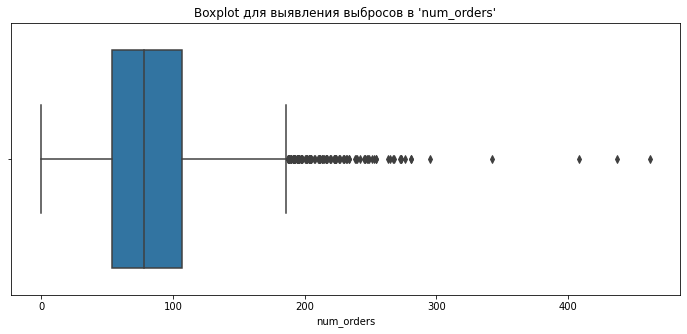


Количество выбросов: 121
Размер исходного датафрейма: (4416, 1)
Размер после удаления выбросов: (4295, 1)


In [3]:
# Проверим датафрейм на пропуски
print("Пропуски:")
print(data.isnull().sum())

# Проверим датафрейм на дубликаты по дате (по индексу)
print("\nДубликаты по индексу:")
duplicates = data.index.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

# А теперь перейдем к выбросам
plt.figure(figsize=(12, 5))
sns.boxplot(x=data['num_orders'])
plt.title("Boxplot для выявления выбросов в 'num_orders'")
plt.show()

# Статистика для оценки выбросов
q1 = data['num_orders'].quantile(0.25)
q3 = data['num_orders'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['num_orders'] < lower_bound) | (data['num_orders'] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Размер исходного датафрейма: {data.shape}")

# Фильтрация данных без выбросов
data = data[(data['num_orders'] >= lower_bound) & (data['num_orders'] <= upper_bound)]
print(f"Размер после удаления выбросов: {data.shape}")

## Анализ

Проведем анализ данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2018-03-01 00:00:00 to 2018-08-31 21:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4295 non-null   int64
dtypes: int64(1)
memory usage: 67.1 KB


Данные в таблице представлены с 1 марта 2018 года по 31 августа 2018 года.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Начать стоило бы просто с построения и анализа графика самого временного ряда. Что он из себя представляет? Какая наблюдается динамика? Прослеживаются ли какие-то паттерны? После этого уже переходим к декомпозиции и рассмотрению деталей.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавила визуализацию, но декомпозиция все-таки намного нагляднее (а выбросы я обработала выше по твоей рекомендации).
    </div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Отлично! По исходному графику тем не менее можно сразу отметить наличие тренда и объяснить это тем фактом, что компания просто растет, развивается, увеличивается база лояльных клиентов, которые готовы повторно обращаться за услугой (так как рост наблюдается с начала периода выборки, а не только в летние месяцы). 

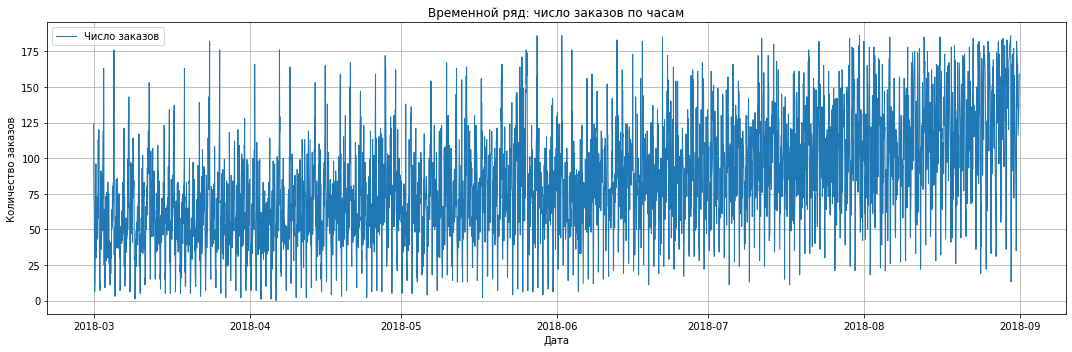

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['num_orders'], label='Число заказов', linewidth=1)
plt.title('Временной ряд: число заказов по часам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Разложим временной ряд на тренд и сезонную компоненту. 

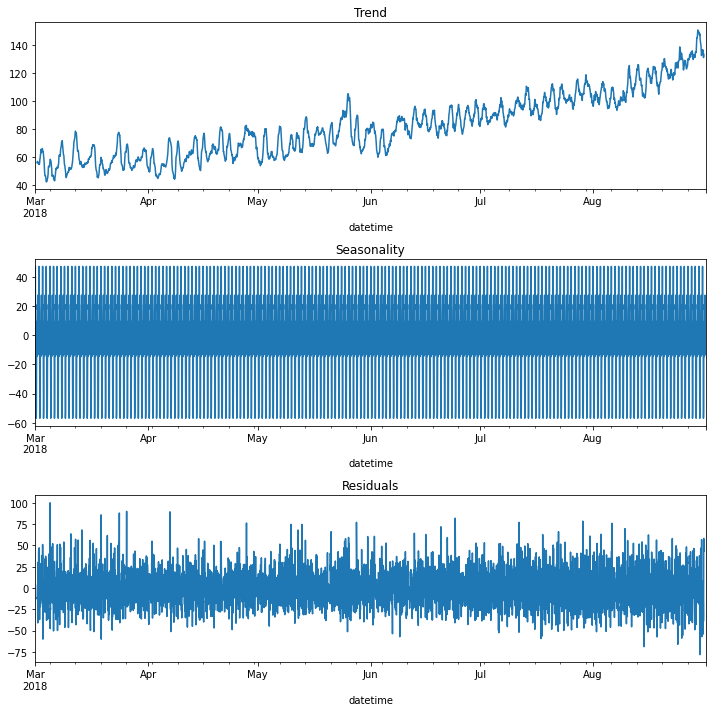

In [6]:
data = data.asfreq('H').fillna(method='ffill')
decomposed = seasonal_decompose(data)

# Построение графиков
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()
plt.show()

Судя по тренду, количество заказов растет.

Период сезонности явно меньше недели, исследуем ее дальше. Построим график сезонной составляющей за первые 7 дней марта 2018 года.

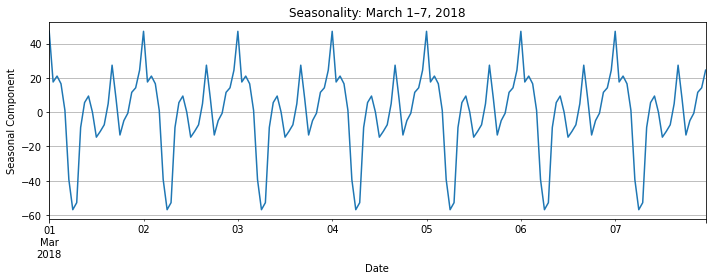

In [7]:
seasonality_march15 = decomposed.seasonal['2018-03-01':'2018-03-07']

plt.figure(figsize=(10, 4))
seasonality_march15.plot()
plt.title('Seasonality: March 1–7, 2018')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.tight_layout()
plt.show()

Построим график за двое суток (период сезонности = 1 сутки).

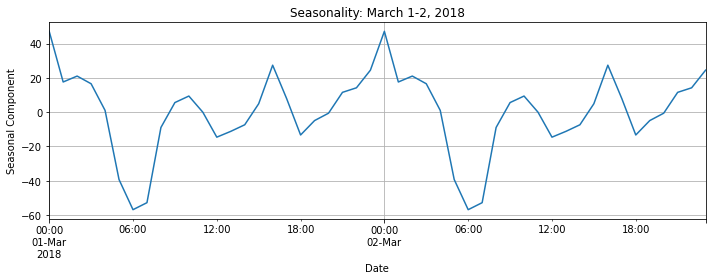

In [8]:
seasonality_march15 = decomposed.seasonal['2018-03-01':'2018-03-02']

plt.figure(figsize=(10, 4))
seasonality_march15.plot()
plt.title('Seasonality: March 1-2, 2018')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.tight_layout()
plt.show()

Пик заказов ближе к полночи, минимальное количество около 6 утра.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* Из-за более явной суточной сезонности мы можем не увидеть наличие недельной. Чтобы попробовать разыскать ее, нам необходимо сделать ресемпл данных по дню (чтобы сгладить суточную сезонность), провести деклмпозицию и точно так же вывести на обозрение только несколько недель, чтобы проанализировать паттерн. 
    
    
* Так же необходимо оценивать остатки декомпозиции, чтобы понимать успешно ли удалось вычленить паттерн, ничего ли не осталось в остатках, что можно еще как-то смоделировать, стационарны ли они.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавила анализ недельных данных, а вот с остатками не очень понимаю (как их анализировать).
    </div>

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Остатки - это все, что остальсь от ряда за вычетом сгенерированных в процессе декомпозиции тренда и сезонности. По графику (и по тестам) остатков мы смотрим, не осталось ли в данных каких-то необъясненных закономерностей: нет ли в остатках значительной автокорреляции, нет ли каких-то существенных выбросов (здесь грубо говоря они есть, но не так существенно, можно пренебречь, иначе анализ и моделирование значительно усложнятся). Если есть, значит мы что-то недообъяснили, и ряд имеет более сложную структуру (например, нелинейный тренд, сезонность с более широким интервалом, или она была вариативная и т.д.). Если всего этого нет, полученный ряд остатков стационарен, то его можно считать шумом - случайными колебаниями.

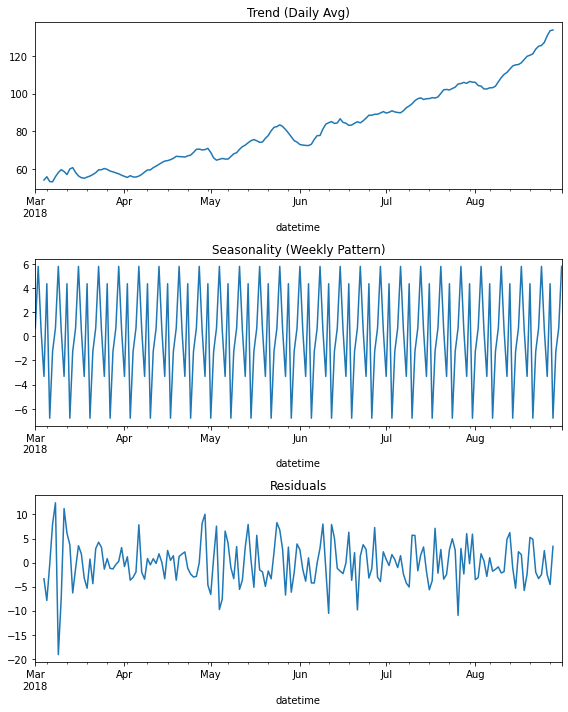

In [9]:
# Ресемплируем до дневных средних значений
daily_data = data['num_orders'].resample('D').mean().fillna(method='ffill')

# Декомпозиция с недельной сезонностью (7 дней)
decomposed_weekly = seasonal_decompose(daily_data, model='additive', period=7)

# Визуализация
plt.figure(figsize=(8, 10))

plt.subplot(311)
decomposed_weekly.trend.plot(ax=plt.gca())
plt.title('Trend (Daily Avg)')

plt.subplot(312)
decomposed_weekly.seasonal.plot(ax=plt.gca())
plt.title('Seasonality (Weekly Pattern)')

plt.subplot(313)
decomposed_weekly.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()
plt.show()

Построим график за 4 недели марта.

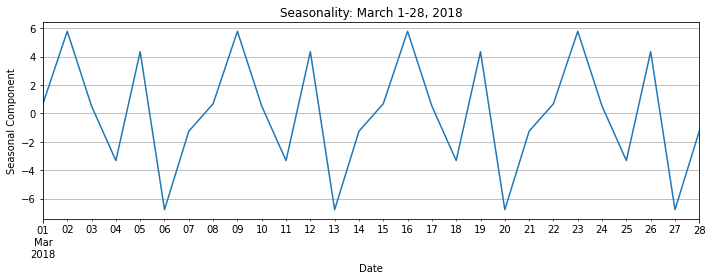

In [10]:
seasonality_march = decomposed_weekly.seasonal['2018-03-01':'2018-03-28']

plt.figure(figsize=(10, 4))
seasonality_march.plot()
plt.title('Seasonality: March 1-28, 2018')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.tight_layout()
plt.show()

Из графика видим, что количество заказов зависит от дня недели.

## Обучение
Обучим разные модели с различными гиперпараметрами. Сделаем тестовую выборку размером 10% от исходных данных.


In [11]:
# функция добавления новых признаков
def make_features(data, max_lag, rolling_mean_size):
    #data['year'] = data.index.year
    #data['month'] = data.index.month
    #data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

# Обнаружена выраженная сезонность:
# - суточная (24 часа)
# - недельная (24 * 7 = 168 часов)
# Поэтому лаги и размер окна выбираем с учетом этих интервалов:
# - max_lag = 24 — чтобы модель учитывала значение аналогичного часа предыдущих суток
# - rolling_mean_size = 168 (24*7) — сглаживание по предыдущей неделе
make_features(data, 24, 168)

train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())



2018-03-08 00:00:00 2018-08-13 11:00:00
2018-08-13 12:00:00 2018-08-31 21:00:00


<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера<a class="tocSkip"></h3>
 
<b>На доработку🤔:</b> Мы не можем использовать год в качетсве признака, поскольку наши данных предоставлены только в рамках одного года, поэтому при обучении модели год возьмет на себя частично роль константы, но при этом такая модель будет неприменима на данных другого года.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Да, с этой точки зрения совсем не подумала. Убрала год, месяц и день месяца, оставила день недели и час. 
    
Количество лагов и размер окна изменила с учетом интервалов обнаруженной сезонности.
    </div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* Месяц/сезон включать в набор признаков тоже не совсем корректно, поскольку у нас не имеется статистики за несколько лет по каждому месяцу/сезону, из-за чего данные признаки просто вберут в себя объяснение тренда, что следовало бы объяснить эффектом других факторов.
    
    Относительно дня месяца, опять же, чисто со смысловой точки зрения наличие цикличности там вряд ли будет наблюдаться. По сравнению с днями недели, которые как-то разграничивают свободное и рабочее время, к дням месяца мы практически не привязаны. Поэтому данный признак вряд ли окажется полезен для объяснения вариации в таргете. Он вберет в себя только тренд, поскольку внутри каждого месяца показатели каждый раз росли, но росли они не за счет дня месяца. 
    
    При этом имеет смысл включить час, взаимосвязь с которым мы обнаружили в результате анализа.
    
    
* Количество лагов и размер окна имеет смысл выбирать с учетом интервалов обнаруженной сезонности.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 
    
* Верно, что не берешь текущее значение таргета для расчета скользящего среднего, иначе бы это создало прямые утечки, и значение метрики было бы непоказательным.
    
    
* Отлично, что делишь данные на выборки последовательно по времени! Это позволяет имитировать реальную ситуацию, когда нам необходимо будет делать предсказания на будущее.

In [12]:
# Выделяем признаки и целевой признак
features = data.columns.drop('num_orders').tolist()
target = 'num_orders'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# создаём списки с названиями признаков
ohe_columns = ['dayofweek', 'hour']
num_columns = [col for col in features if col not in ohe_columns]

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
    )

#ord_pipe = Pipeline([
 #   ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
#])

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     #('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера<a class="tocSkip"></h3>
 
<b>На доработку🤔:</b> Несмотря на то, что в каком-то смысле календарные признаки все же упорядоченные, их порядковый вид не подойдет для линейной модели. Причина в том, что наш целевой признак изменяется не линейно с увеличением значения календарного признака. Поэтому если бы мы закодировали его через порядковое кодирование и пытались бы найти линейную взаимосвязь, то потерпели бы неудачу и признак оказался бы бесполезен. В данном случае как минимум линейная модель требует <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OHE</a> кодирования.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправила
    </div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

In [13]:
results = []
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(3, 20),
        'models__max_features': range(3, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        #'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    
    # словарь для модели Ridge
    {
        'models': [Ridge()],
        'models__alpha': np.linspace(0.1, 10, 50),
        #'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },

    # словарь для модели Lasso
    {
        'models': [Lasso(max_iter=10000)],
        'models__alpha': np.linspace(0.001, 1, 50),
       # 'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
]
tscv = TimeSeriesSplit(n_splits=5)

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    cv=tscv,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    return_train_score=True
)

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> У классической линейной регрессии гиперпараметров, которые необходимо подбирать, нет. 
    
`fit_intercept` определяет, будет ли оцениваться константный коэффициент, но с ним модель всегда лучше (поэтому дефолтно константа всегда оценивается), а выключить ее необходимо только тогда, когда у нас есть теоретическое обоснование, что константа должна быть нулевой (при отсутствии импульсов со стороны признаков значение таргета в среднем должно быть нулевое).
    
Аналогично данный параметр не является гиперпараметром и для моделей с регуляризацией.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Закомментировала
    </div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
    
<b>На доработку🤔:</b> В случае с временными рядами необходимо использовать специфическую кросс-валидацию (<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html'>TimeSeriesSplit</a>), чтобы сохранить тот же принцип разделения на выборки по времени и подбирать гиперпараметры с учетом качества предсказаний на будущее.

  <div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Спасибо! Исправила
    </div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

In [14]:
warnings.filterwarnings('ignore')
randomized_search.fit(X_train, y_train)

#отображаем работу со всеми моделями, которые пробовали
for params, mean_score in zip(randomized_search.cv_results_['params'], randomized_search.cv_results_['mean_test_score']):
    params_copy = params.copy()
    params_copy.pop('models', None)
    results.append({'Модель': params['models'], 'Параметры': params_copy, 'Средний RMSE': -mean_score})

results_df = pd.DataFrame(results)
display(results_df)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика (RMSE) лучшей модели на тренировочной выборке (при кроссвалидации):', -randomized_search.best_score_)


,Модель,Параметры,Средний RMSE
0,Ridge(),"{'preprocessor__num': MinMaxScaler(), 'models_...",22.932081
1,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",31.279387
2,"Lasso(alpha=0.062163265306122456, max_iter=10000)","{'preprocessor__num': MinMaxScaler(), 'models_...",22.760034
3,Ridge(),"{'preprocessor__num': MinMaxScaler(), 'models_...",22.963732
4,Ridge(),"{'preprocessor__num': MinMaxScaler(), 'models_...",22.982239
...,...,...,...
95,"Lasso(alpha=0.062163265306122456, max_iter=10000)","{'preprocessor__num': StandardScaler(), 'model...",25.240466
96,"Lasso(alpha=0.062163265306122456, max_iter=10000)","{'preprocessor__num': MinMaxScaler(), 'models_...",26.830797
97,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",31.650936
98,"Lasso(alpha=0.062163265306122456, max_iter=10000)","{'preprocessor__num': MinMaxScaler(), 'models_...",25.026322


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dayofweek', 'hour']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_1', 'lag_2', 'lag_3',
                                                   'lag_4', 'lag_5', 'lag_6',
                                                   'lag_7', 'lag_8', 'lag_9',
                                                   'lag_

## Тестирование

In [15]:
# проверяем работу модели на тестовой выборке
# рассчитываем прогноз на тестовых данных
y_test_pred = np.round(randomized_search.predict(X_test), 2)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Метрика RMSE на тестовой выборке: {rmse:.2f}')

Метрика RMSE на тестовой выборке: 26.30


Визуализируем "Прогноз vs Истинные значения", а также проверку модели на адекватность (сравним с "наивным" прогнозом - предыдущее значение).

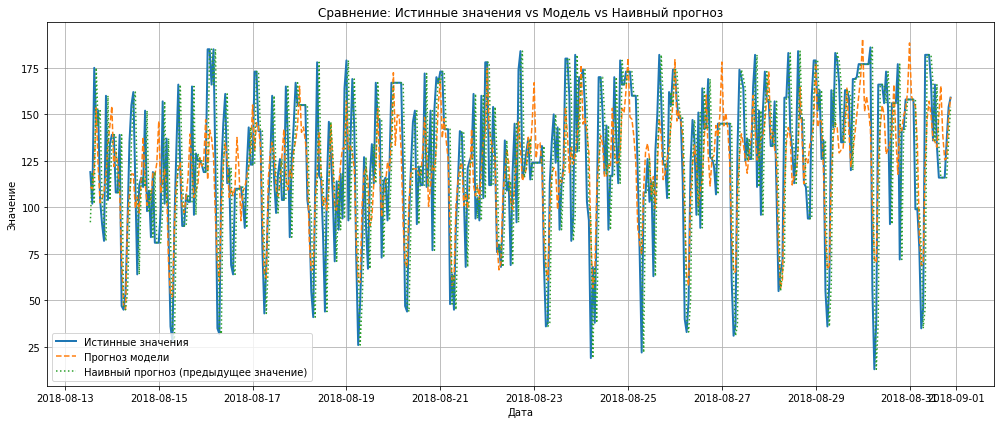

RMSE наивной модели: 38.25
RMSE вашей модели: 26.30


In [16]:
# "Наивный" прогноз: предыдущие значения
y_test_naive = y_test.shift(1).dropna()
y_test_model = pd.Series(y_test_pred, index=y_test.index).loc[y_test_naive.index]
y_test_actual = y_test.loc[y_test_naive.index]

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual.index, y_test_actual, label='Истинные значения', linewidth=2)
plt.plot(y_test_model.index, y_test_model, label='Прогноз модели', linestyle='--')
plt.plot(y_test_naive.index, y_test_naive, label='Наивный прогноз (предыдущее значение)', linestyle=':')
plt.title('Сравнение: Истинные значения vs Модель vs Наивный прогноз')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Метрики
rmse_naive = mean_squared_error(y_test_actual, y_test_naive, squared=False)
print(f'RMSE наивной модели: {rmse_naive:.2f}')
print(f'RMSE вашей модели: {rmse:.2f}')

## Итоговый вывод

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно было спрогнозировать количество заказов такси на следующий час. В данном проекте была построена модель для такого предсказания.

Что было сделано (тезисно):

1. Были загружены данные, выполнено их ресемплирование по одному часу, а также данные были проверены на дубликаты и выбросы.
2. Выполнен анализ данных (декомпозиция, анализ тренда, сезонности).
3. Обучены разные модели с различными гиперпараметрами. 
4. Данные были проверены на тестовой выборке, а также выполнена визуализация сравнения предсказания с истиной в динамике, чтобы лучше предстваить, чего же мы в итоге достигли. Также мы провести проверку итоговой модели на адекватность (в нашей задаче самой простой моделью можно считать, например, использование предыдущего значения).

Значение метрики *RMSE* на тестовой выборке должно было быть не больше 48, нам удалось достичь показателя 26.30.